# Original Notebook can be found in [here](https://www.kaggle.com/code/phamdinhkhanh/matrix-factorization-movie-length-1m/notebook)

## 1. Introduction to the Recommendation system method
### 1. 1. The importance of recommendation system
In everyday life, we often see quite accidental situations when large systems have the ability to read and understand user preferences and display information that users are interested in very accurately. Such as:

* Facebook has the ability to display statuses of people you care about on your newsfeed.
* Youtube can automatically jump to videos you're likely to like based on what you're watching.
* Amazon may offer books in the same category as the books you have purchased or with high ratings.
* Google may show an ad for an item that matches your recent searches.

Without recommendation algorithms, the user experience will be poorer because the information they are really interested in is not presented at the right time while unnecessary information is presented more often. As a result, users feel annoyed and have confusing information. In the field of marketing, recommendation systems become even more important. Each product delivered to the right consumer will increase revenue, reduce time costs, advertising costs and help consumers own what they need. In the field of entertainment such as videos, games, online stories,... users will achieve high satisfaction when finding the right type of entertainment they love easily. Although it was only born in the last 10 years, along with the internet boom, it can be said that `recommendation system` is a vibrant research field. It has created a revolution that has changed shopping behavior, entertainment behavior, business strategies,... globally. Hundreds of millions of small businesses are benefiting from it by exploiting endless customer sources from network resources and turning this sales channel into a replacement for traditional channels. This field is also the key to helping technology companies Google, Facebook, Amazon, Microsoft,... become the world's leading corporations. That's why 'recommendation system' is always invested in research and development by online business companies to create a smart system to improve customer experience and optimize resources.

### 1.2. Recommendation method

Above we know the role of the `recommendation system` in the development of the internet and online business. But what really is the `recommendation system` problem? We still don't really understand the basis of the `recommendation system` method. According to the definition from wikipedia, `recommendation system` is a small branch of the field of *information filtering system* (information filtering system) used to predict the level of popularity through the rating of a user. for a product (item). To offer the most suitable products to users requires systems to rely on product rating information, user information, and product information to build optimal algorithms. Based on the loss function to calculate the algorithm's prediction error and find a method with the most accurate prediction level. There are many different algorithms used in the `recommendation system` but they basically include two main methods: `Collaborative filtering` and `Content based filtering`. The basic difference between these two methods is:

* Collaborative filtering: Based on correlations in consumer behavior or product characteristics to find users or items with similar characteristics and interests. From there, based on the information that the user group or the most recent related product has rated, to evaluate the product that a specific user has not rated. However, the disadvantage of this algorithm is that it makes predictions about ratings without fully understanding the users and items, but is completely based on observations of the equivalence between groups of users and items for prediction. The algorithm used in these problems is mainly k-nearest neighbor to find equivalence groups and the correlation coefficient matrix is used to measure the degree of behavioral or characteristic closeness for grouping. .

* Content based filtering: Based on information and content related to the product such as manufacturer, genre, year of manufacture, uses, characteristics,... or based on user information such as gender , age, industry,... to make predictions about people's ratings for that product. This algorithm is simply a regression equation between the dimensions of product or user characteristics against rating scores without taking advantage of behavioral correlations between user groups or product characteristics such as ` Collaborative filtering`. In fact, user behavior shows that they are very similar if they belong to the same group, such as meditation music, gold music, youth music, and children's music groups, which will be suitable for the elderly, middle-aged people, young people, etc. Children. Not considering group correlation factors is a major limitation of content based filtering.


Each algorithm has different advantages and disadvantages, and the level of effectiveness in predicting the popularity of (user, item) pairs (*user, product*) also varies depending on the data set. But the algorithms all have in common that they use data that users have rated products as a basis for predicting ratings for unrated products. This is like playing a game of filling in numbers into the *utility matrix*. One dimension of the matrix corresponds to users and the other dimension corresponds to items. The cells on the matrix represent the user's rating value corresponding to the item. Thus, there will be cells that have been rated by users and the remaining cells that have not been rated. The process of solving the problem is like solving the matrix in the missing cells so that the final error between forecast and reality is smallest.

### 1.3. Introducing the matrix factorization algorithm


In the matrix factorization algorithm, we assume the item's characteristics are represented by the matrix $\mathbf{I}$ and the user's behavior is represented by the matrix $\mathbf{U}$. For each row of the matrix $\mathbf{I}$ is a latent feature (*latent feature*) of the product and each column of $\mathbf{U}$ is a user's preference for the feature. corresponding hidden. These hidden characteristics can be considered as principal factors aggregated from various product-related information similar to principal components in principal component analysis `PCA`. The characteristics of the mth product are represented by the line vector $\mathbf{i_m}$ and the behavior of the nth user is represented by the column vector $\mathbf{u_n}$. Then the predictive value of a user n's preference for a product m will be the product of two vectors $\mathbf{i_m}$ and $\mathbf{u_n}$:
\begin{equation*}
y_{mn} = \mathbf{i_m} \mathbf{u_n}
\end{equation*}

The estimate of the utility matrix $\mathbf{\hat{Y}}$ will be expressed in terms of the behavior matrix $\mathbf{I}$ and the user matrix $\mathbf{U}$ as follows:


\begin{equation*}
\mathbf{\hat{Y}} \approx \left[ \begin{matrix}
\mathbf{i}_1\mathbf{u}_1 & \mathbf{i}_1\mathbf{u}_2 & \dots & \mathbf{i}_1 \mathbf{u}_N\\
\mathbf{i}_2\mathbf{u}_1 & \mathbf{i}_2\mathbf{u}_2 & \dots & \mathbf{i}_2 \mathbf{u}_N\\
\dots & \dots & \ddots & \dots \\
\mathbf{i}_M\mathbf{u}_1 & \mathbf{i}_M\mathbf{u}_2 & \dots & \mathbf{i}_M \mathbf{u}_N\\
\end{matrix} \right]
 = \left[ \begin{matrix}
\mathbf{i}_1 \\
\mathbf{i}_2 \\
\dots \\
\mathbf{i}_M \\
\end{matrix} \right]
\left[ \begin{matrix}
\mathbf{u}_1 & \mathbf{u}_2 & \dots & \mathbf{u}_N
\end{matrix} \right] = \mathbf{IU}
\end{equation*}


### 1.4. Gradient descent algorithm

Assuming that we already have information about the matrices $\mathbf{U}$ and $\mathbf{I}$ what we need to do now is consider the rows of each $\mathbf{I}$ as a profile item and each column of $\mathbf{U}$ is a user profile. Suppose $\mathbf{I} \in \mathbb{R}^{M \times K}$, $\mathbf{U} \in \mathbb{R}^{K \times N}$, $\mathbf{ Y} \in \mathbb{R}^{M \times N}$. Normally we will choose the number of hidden features smaller than the number of products and users. Then Y will be expressed as the product of 2 matrices with lower rank (*Low-rank Matrix factorization*):

\begin{aligned}\hat{\mathbf{Y}} = \mathbf{I}\mathbf{U}\end{aligned}

The loss function of the algorithm is the standard [Frobenius norm](http://mathworld.wolfram.com/FrobeniusNorm.html) of the difference between $\mathbf{Y}$ and $\mathbf{\hat{Y}} $ as follows:

\begin{aligned}
\mathcal{L(\mathbf{I},\mathbf{U})} = \frac{1}{2s}||\mathbf{Y}-\mathbf{\hat{Y}}||_{F} ^2
\end{aligned}

To avoid overfitting [2nd order correction factor](https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c) (*l2 - reguralization*) is added:

\begin{equation*}
\mathcal{L(\mathbf{I},\mathbf{U})} = \frac{1}{2s}||\mathbf{Y}-\mathbf{\hat{Y}}||_{F}^2 + \frac{\lambda_1}{2}||\mathbf{I}||_{F}^2 + \frac{\lambda_2}{2}||\mathbf{U}||_{F}^2             \tag{1.4.1}
\end{equation*}

If $\mathbf{U}$ is considered fixed and $\mathbf{I}$ needs to be optimized. The `Matrix factorization` problem would be equivalent to optimizing the loss function:

\begin{aligned}
\mathcal{L(\mathbf{I})} = \frac{1}{2s}||\mathbf{Y}-\mathbf{\hat{Y}}||_{F}^2 + \frac{ \lambda_1}{2}||\mathbf{I}||_{F}^2
\end{aligned}

If $\mathbf{I}$ is considered fixed and $\mathbf{U}$ needs to be optimized. The loss function will have the form:

\begin{aligned}
\mathcal{L(\mathbf{U})} = \frac{1}{2s}||\mathbf{Y}-\mathbf{\hat{Y}}||_{F}^2 + \frac{ \lambda_2}{2}||\mathbf{U}||_{F}^2
\end{aligned}

We see that the loss functions are all convex functions. Finding the optimal solution can be based on the quadratic convex optimization problem (*Quadratic Programming*) or a simpler way is through the `gradient descent` algorithm. We will use the `Stochastic gradient descent` algorithm to update each data point in turn across the entire data, then repeat this process. In the case of a fixed product matrix ($\mathbf{I}$), we will need to update the user matrix ($\mathbf{U}$) according to gradient descent. For each update, a user u is selected. Based on information about products that users have rated. Vector gradient descent is calculated to update the value of the corresponding vector $\mathbf{u}$. This process continues until all users vectors are updated. The same goes for the case of fixing the fixed user matrix and updating the product matrix.

**Optimize user matrix:**

To simplify the calculation process, we can express the loss function according to the total loss function of each user as follows:

\begin{aligned}
\mathcal{L(\mathbf{U})} = \frac{1}{2s}\sum_{n = 1}^{N}\sum_{m: r_{mn} = 1} (y_{mn} - i_m . u_n)^2+\frac{\lambda_1}{2} ||\mathbf{U}||_{F}^2
\end{aligned}

Where $r_{mn}$ is an element of the rating matrix $R \in \mathbb{R}^{M \times N}$ with value 0 or 1. $r_{mn} = 1$ marks the product Product m has been rated by user n and is 0 in case it has not been rated. The condition $r_{mn} = 1$ in the loss function is to filter out products that have been rated by user n. Then, if we consider $\hat{\mathbf{I}}_n$ to be the matrix of rated products of user n and $\hat{y}_n$ to be the corresponding rating result vector, then the loss function for user n is abbreviated as follows:

\begin{aligned}
\mathcal{L(\mathbf{U}| user = n)} = \frac{1}{2s}\sum_{m: r_{mn} = 1}(y_{mn} - \mathbf{i_m} . \ mathbf{u_n})^2 + \frac{\lambda_1}{2}||\mathbf{u_n}||^2 = \frac{1}{2s}||\mathbf{\hat{y}_n}- \hat{\mathbf{I}}_n. \mathbf{u_n}||^2 + \frac{\lambda_1}{2}||\mathbf{u_n}||^2
\end{aligned}

Its derivative corresponds to:

\begin{aligned}
\frac{\partial \mathcal{L(\mathbf{U}| user = n)}}{\partial \mathbf{u_n}} = -\frac{1}{s}\hat{\mathbf{I}} _n^{T}\space (\mathbf{\hat{y}_n}-\hat{\mathbf{I}}_n. \mathbf{u_n}) + \lambda_1\mathbf{u_n}
\end{aligned}

Formula to update the solution for each column of the user matrix:

\begin{aligned}
\mathbf{u'_n} = \mathbf{u_n} - \theta (-\frac{1}{s}\hat{\mathbf{I}}_m^{T}\space (\mathbf{\hat{y }_n}-\hat{\mathbf{I}}_n. \mathbf{u_n}) + \lambda_1\mathbf{u_n})
\end{aligned}

**Optimize product matrix:**

Completely similar, we also have for the product matrix, the loss function for item = m:

\begin{aligned}
\mathcal{L(\mathbf{I}| item = m)} = \frac{1}{2s}\sum_{n: r_{mn} = 1}(y_{mn} - \mathbf{i_m} . \mathbf{u_n})^2 + \frac{\lambda_1}{2}||\mathbf{i_m}||^2 = \frac{1}{2s}||\mathbf{\hat{y}_m}-\mathbf{i_m}.\hat{\mathbf{U}}_m||^2 + \frac{\lambda_1}{2}||\mathbf{i_m}||^2
\end{aligned}

The corresponding derivative for each item will be:

\begin{aligned}
\frac{\partial \mathcal{L(\mathbf{I}| item = m)}}{\partial \mathbf{i_m}} = -\frac{1}{s}(\mathbf{\hat{y}_m}-\mathbf{i_m}. \hat{\mathbf{U}}_m)\hat{\mathbf{U}}_m^{T} + \lambda_1\mathbf{i_m}
\end{aligned}

Formula to update the solution for each row of the product matrix:

\begin{aligned}
\mathbf{i'_m} = \mathbf{i_m} - \theta (-\frac{1}{s}(\mathbf{\hat{y}_m}-\mathbf{i_m}. \hat{\mathbf{U}}_m)\hat{\mathbf{U}}_m^{T} + \lambda_1\mathbf{i_m})
\end{aligned}

## 2. Build algorithm code

### 2.1. Practice on the movie length 1M data set

We will perform the `matrix factorization` method on the [Movie length 1M](http://files.grouplens.org/datasets/movielens/ml-1m.zip) data set of 1 million ratings for about 4000 Movies are collected from 6000 users. To facilitate compliance with the developed algorithm, data processing will be performed on the matrix. Load input data as follows:


In [1]:
import pandas as pd
import numpy as np
columns = ['user_id', 'item_id', 'rating', 'timestamp']
movie_length = pd.read_csv('../input/ratings.dat', header = 0, \
                           names = columns, sep = '::', engine = 'python')
movie_length = movie_length.sort_values(['user_id', 'item_id'])
movie_length.head()

,user_id,item_id,rating,timestamp
39,1,1,5,978824268
24,1,48,5,978824351
38,1,150,5,978301777
43,1,260,4,978300760
22,1,527,5,978824195


Size of data and number of users and items

In [2]:
print('Data movie length shape: %s'%str(movie_length.shape))
print('No customers: %s'%str(np.unique(movie_length.iloc[:, 0]).shape[0]))
print('No movies: %s'%str(np.unique(movie_length.iloc[:, 1]).shape[0]))

Data movie length shape: (1000208, 4)
No customers: 6040
No movies: 3706


Statistics describing the rating frequency of users:

In [3]:
movie_length['user_id'].value_counts().describe()

count    6040.000000
mean      165.597351
std       192.747126
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
Name: user_id, dtype: float64

* On average, one user rates a total of 165 movies.
* The lowest user rates 20 movies and the highest user rates 2314 movies.
* The range of popular rating movies per user is from 44 to 208 movies (accounting for 50%).

Text(0,0.5,'No customers')

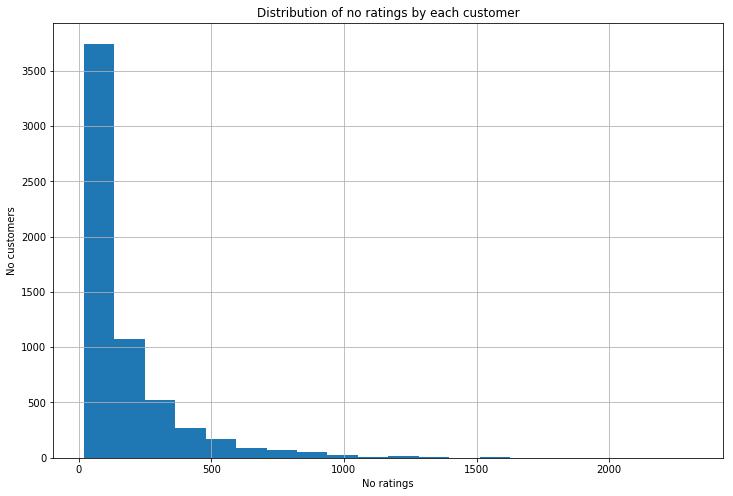

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
movie_length[['user_id', 'item_id']].groupby(['user_id']).count().\
hist(bins = 20, figsize = (12, 8))
plt.title('Distribution of no ratings by each customer')
plt.xlabel('No ratings')
plt.ylabel('No customers')

Looking at the distribution of the number of users according to rating level, we can see that our sample has an imbalance phenomenon when many users rate very little and many users rate more. However, this is not a classification problem, so the fact that the sample size is imbalanced does not affect the accuracy of the algorithm. Furthermore, the `matrix factorization` algorithm builds an individual loss function for each user so that how many products this user rates does not affect the rating prediction results of other users. Completely similar, we can also statistics the number of user ratings for each movie.

In [5]:
movie_length['item_id'].value_counts().describe()

count    3706.000000
mean      269.888829
std       384.046815
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
Name: item_id, dtype: float64

Text(0,0.5,'No movies')

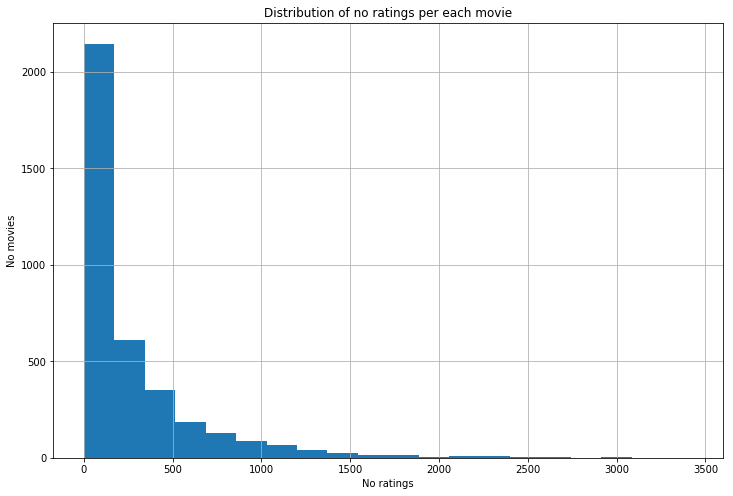

In [6]:
movie_length[['user_id', 'item_id']].groupby(['item_id']).count().\
hist(bins = 20, figsize = (12, 8))
plt.title('Distribution of no ratings per each movie')
plt.xlabel('No ratings')
plt.ylabel('No movies')

A few reviews:
* The number of times a movie is rated at least once.
* The highest number of times a movie has been rated is 3,428 times.
* The popular rating of a movie is from 33 to 123 times.

## 2.2. Matrix factorization algorithm

### 2.2.1. Functions in algorithms

First, we will divide the train and test sample proportionally so that the number of ratings in the train set accounts for 2/3 of the number of ratings. The most reasonable way to divide the sample is to ensure that the ratio of the number of ratings appearing in the training set to the number of ratings appearing in the test set of the same user is equal. This division ensures fairness for users when no user has too much training data and little test data or too little training data but too much test data. The predicted value from a model with too little training data will often be inaccurate and distort the error checking results on the test.

In [7]:
#declare split_rate for train/total ratings
split_rate = 2/3

def split_train_test(dataset):
    gb = dataset.groupby('user_id')
    ls = [gb.get_group(x) for x in gb.groups]
    items = [x for x in gb.groups]
    index_size = [{'i': i, 'index':gb.groups[i], 'size':len(gb.groups[i])} for i in items]
    index_train = pd.Int64Index([])
    index_test = pd.Int64Index([])
    for x in index_size:
        np.random.shuffle(x['index'].values)
        le = int(x['size']*split_rate)
        index_train = index_train.append(x['index'][:le])
        index_test = index_test.append(x['index'][le:])
    train = dataset.iloc[index_train].values
    test = dataset.iloc[index_test].values
    #minus id to 1 to index start from 0
    train[:, 0] -= 1
    train[:, 1] -= 1
    test[:, 0] -= 1
    test[:, 1] -= 1
    return train, test

train, test = split_train_test(movie_length)

**Proceed to build the algorithm:**

Key variables for the data reporting algorithm include:
* n_users: Number of users (which is $N$ in the algorithm).
* n_items: Number of items (which is $M$ in the algorithm).
* K: Number of hidden factors used (value $K$ in the algorithm).
* theta: Parameter $\theta$ to update coefficients in the gradient descent algorithm.
* split_rate: Train/test sample split ratio.
* lamda: Calibration parameter of the `l2 - regularization` component (For simplicity set $\lambda_1 = \lambda_2$).
* I: Product matrix.
* U: User matrix.

Note that the matrices $\mathbf{I}, \mathbf{U}$ are built based on *hidden factors* (latent features), so initially we cannot determine these factors and must initialize them. random value for them. The number of hidden factors $K$ is an arbitrary value that we can choose. According to [Matrix Factorization For Recommendation System](https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf), the more the number of hidden factors, the more accurate the algorithm is but also increases computational costs. At the same time, models built on hidden factors that have been refined to have a large degree of variance also provide more accurate results than creating random hidden factors.

In [8]:
n_users = np.max(train[:, 0] + 1) #plus one because index start from 0
n_items = np.max(train[:, 1] + 1)
n_ratings = train.shape[0]
print('N user dimesion: %s'%n_users)
print('M item dimesion: %s'%n_items)
print('S Number of rating: %s'%n_ratings)
K = 2
theta = 0.75
lamda = 0.2
#Inititalize random matrix according to Gauss distribution
I = np.random.randn(n_items, K)
U = np.random.randn(K, n_users)

N user dimesion: 6040
M item dimesion: 3952
S Number of rating: 664826


In [9]:
import scipy.sparse as sparse
#Rating matrix
Y = np.zeros(shape = (n_items, n_users))
print('Y utility matrix shape: %s'%str(Y.shape))
Y = sparse.coo_matrix((train[:, 2], (train[:, 1], train[:, 0])),\
                      shape = (n_items, n_users), dtype = np.float).toarray()

Y utility matrix shape: (3952, 6040)


Not all values on the matrix $\mathbf{Y}$ are rated. Therefore, the matrix $\mathbf{R}$ is created to mark the rated positions of $\mathbf{Y}$ with value 1 and not yet rated with 0.

In [10]:
R = sparse.coo_matrix((np.ones((n_ratings,)), (train[:, 1], train[:, 0])),\
                      shape = (n_items, n_users)).toarray()

In order for the `gradient descent` algorithm to converge faster, we need to normalize the matrix $\mathbf{Y}$ to an expected value of 0 by subtracting each rating value in a user's rating vector from the average of each user's rating vector. that rating vector.

In [11]:
def standardize_Y(Y):
    sum_rating = Y.sum(axis = 0)
    u_rating = np.count_nonzero(Y, axis = 0)
    u_mean = sum_rating/u_rating
    for n in range(n_users):
        for m in range(n_items):
            if Y[m, n] != 0:
                Y[m, n] -= u_mean[n]
    return Y, u_mean

Y_stad, u_mean = standardize_Y(Y)

After normalizing the matrix $\mathbf{Y}$, the most important part is applying the `gradient descent` algorithm to optimize the coefficients of the matrices $\mathbf{U}, \mathbf{I}$ . Based on the algorithm theory developed in section **1.4** to build matrix update functions:

**Gradient descent algorithm for user matrix:**

In [12]:
def updateU(U):
    for n in range(n_users):
    # Matrix items include all items is rated by user n
        i_rated = np.where(Y_stad[:, n] != 0)[0] #item's index rated by n
        In = I[i_rated, :]
        if In.shape[0] == 0:
            U[:, n] = 0
        else: 
            s = In.shape[0]
            u_n = U[:, n]
            y_n = Y_stad[i_rated, n]
            grad = -1/s * np.dot(In.T,(y_n-np.dot(In, u_n))) + lamda*u_n
            U[:, n] -= theta*grad
    return U

**Gradient descent algorithm for product matrix:**

In [13]:
def updateI(I):
    for m in range(n_items):
    # Matrix users who rated into item m
        i_rated = np.where(Y_stad[m, :] != 0)[0] #user's index rated into m
        Um = U[:, i_rated]
        if Um.shape[1] == 0: 
            I[m, :] = 0
        else:
            s = Um.shape[1]
            i_m = I[m, :]
            y_m = Y_stad[m, i_rated]
            grad = -1/s * np.dot(y_m - np.dot(i_m, Um), Um.T) + lamda*i_m
            I[m, :] -= theta*grad
    return I

**Build the matrix prediction function $\mathbf{Y}$:**

Based on the matrix $\mathbf{U}$ and $\mathbf{I}$, we can calculate the prediction matrix of $\mathbf{Y}$ as $\mathbf{\hat{Y}}$ according to the formula formula *(1.4.0)* and build the *pred()* function. The forecast results need to be converted back to the rating by adding the average rating of each user to the rating values belonging to the same user. Some results will exceed the rating value range of [1, 5] and will then be reassigned to the two endpoints 1 or 5. The resulting matrix will satisfy a cell of $\mathbf{\hat {Y}}$ is the user rating prediction result for the corresponding product. Because we only need to evaluate the match $\mathbf{Y}$ on pairs (user, item) that have been rated, in the function *pred_train_test()* we need to rely on the rating matrix $\mathbf{R}$ instead unrated positions are equal to 0. The reason this function is named *pred_train_test()* is that we can do the same for the test set by replacing the unrated value with 0.

In [14]:
def pred(U, I):
    #predict utility matrix base on formula Y_hat = I.U
    Y_hat = np.dot(I, U)
    #invert to forecast values by plus user's mean ratings
    for n in range(n_users):
        Y_hat[:, n] += u_mean[n]
    #convert to interger values because of rating is integer
    Y_hat = Y_hat.astype(np.int32) 
    #replace values > 5 by 5 and values < 1 by 1
    Y_hat[Y_hat > 5] = 5
    Y_hat[Y_hat < 1] = 1
    return Y_hat

def pred_train_test(Y_hat, R):
    #replace values have not yet rated by 0 
    Y_pred = Y_hat.copy()
    Y_pred[R == 0] = 0
    return Y_pred

**Build the loss function:**

The loss function is built based on the formula *(1.4.1)* as follows:

In [15]:
def loss(Y, Y_hat):
    error = Y-Y_hat
    loss_value = 1/(2*n_ratings)*np.linalg.norm(error, 'fro')**2 + \
    lamda/2*(np.linalg.norm(I, 'fro')**2 + np.linalg.norm(U, 'fro')**2)
    return loss_value

Use the matrix $\mathbf{\hat{Y}}$ to predict on the test set

In [16]:
Y_test = sparse.coo_matrix((test[:, 2], (test[:, 1], test[:, 0])), \
                           shape = (n_items, n_users), dtype = np.float).toarray()
R_test = sparse.coo_matrix((np.ones(test.shape[0]), (test[:, 1], test[:, 0])), \
                           shape = (n_items, n_users), dtype = np.float).toarray()

**Build a function to calculate RMSE:**

After calculating the prediction matrix $\mathbf{\hat{Y}}$ on the test set combined with the utility matrix $\mathbf{Y}$ of the known test set, we will calculate *RMSE* on the test set. test as follows:

In [17]:
import math
def RMSE(Y_test, Y_pred):
    error = Y_test - Y_pred
    n_ratings = test.shape[0]
    rmse = math.sqrt(np.linalg.norm(error, 'fro')**2/n_ratings)
    return rmse

**Building the main optimization loop:**
    
After designing the calculation functions *loss function, RMSE* and optimization functions *gradient descent*, we will proceed to build an optimization loop to update the matrices $\mathbf{U}$ and $ \mathbf{I}$ and evaluate the effectiveness of each iteration through the value of *loss function* and *RMSE*.

In [18]:
def fit(Umatrix, Imatrix, Ytrain, Ytest, n_iter, log_iter):
    for i in range(n_iter):
        #update U and I
        Umatrix = updateU(Umatrix)
        Imatrix = updateI(Imatrix)
        #calculate Y_hat
        Y_hat = pred(Umatrix, Imatrix)
        #calculate Y_hat_train by replace non ratings by 0
        Y_pred_train = pred_train_test(Y_hat, R)
        #calculate loss function
        loss_value = loss(Ytrain, Y_pred_train)
        #calculate Y_pred on test dataset
        Y_pred_test = pred_train_test(Y_hat, R_test)
        #calculate RMSE
        rmse = RMSE(Ytest, Y_pred_test)
        if i % log_iter == 0:
            print('Iteration: {}; RMSE: {}; Loss value: {}'.format(i, rmse, loss_value))
    return Y_hat, Y_pred_test   
# Y_hat, Y_pred = fit(Umatrix = U, Imatrix = I, Ytrain = Y, Ytest = Y_test, n_iter = 100, log_iter = 10)

### 2.2.2. Build class MF

Based on the functions processed in *(2.2.1)*, we will design the MF class with the function of processing data, fitting the model, evaluating model results and giving recommendations to customers about the product as follows :

**Class Data handles data:**

In [19]:
class Data(object):
    """
    This class used to manage data.
    Two arguments:
    dataset: pandas data frame include user_id, item_id and rating
    split_rate: number train ratings/ total ratings
    """
    def __init__(self, dataset, split_rate):
        self.dataset = dataset
        self.split_rate = split_rate
        self.train, self.test = self.split_train_test(self.dataset)
        self.n_users = np.max(self.train[:, 0] + 1) #plus one because index start from 0
        self.n_items = np.max(self.train[:, 1] + 1)
        self.Ytrain, self.Rtrain = self.utility_matrix(self.train)
        self.Ytest , self.Rtest  = self.utility_matrix(self.test)
        self.Ystad,  self.u_mean = self.standardize_Y(self.Ytrain)
        self.n_ratings = self.train.shape[0]
        
    def split_train_test(self, dataset):
        "split train and test"
        gb = dataset.groupby('user_id')
        ls = [gb.get_group(x) for x in gb.groups]
        items = [x for x in gb.groups]
        index_size = [{'i': i, 'index':gb.groups[i], 'size':len(gb.groups[i])} for i in items]
        index_train = pd.Int64Index([])
        index_test = pd.Int64Index([])
        for x in index_size:
            np.random.shuffle(x['index'].values)
            le = int(x['size']*self.split_rate)
            index_train = index_train.append(x['index'][:le])
            index_test = index_test.append(x['index'][le:])
        train = dataset.iloc[index_train].values
        test = dataset.iloc[index_test].values
        #minus id to 1 to index start from 0
        train[:, 0] -= 1
        train[:, 1] -= 1
        test[:, 0] -= 1
        test[:, 1] -= 1
        return train, test
    
    def utility_matrix(self, data_mtx):
        "create Y and R matrix"
        Y = np.zeros(shape = (self.n_items, self.n_users))
        Y = sparse.coo_matrix((data_mtx[:, 2], (data_mtx[:, 1], data_mtx[:, 0])), \
                              shape = (self.n_items, self.n_users), dtype = np.float).toarray()
        R = sparse.coo_matrix((np.ones((data_mtx.shape[0],)), (data_mtx[:, 1], data_mtx[:, 0])), \
                              shape = (self.n_items, self.n_users)).toarray()
        return Y, R
    
    def standardize_Y(self, Y):
        "standard data to mean ratings of each user = 0"
        sum_rating = Y.sum(axis = 0)
        u_rating = np.count_nonzero(Y, axis = 0)
        u_mean = sum_rating/u_rating
        for n in range(self.n_users):
            for m in range(self.n_items):
                if Y[m, n] != 0:
                    Y[m, n] -= u_mean[n]
        return Y, u_mean

**Class model for construction and model evaluation:**

In [20]:
class Model():
    """
    This class manage update U and I matrix, predict and evaluate error
    Four arguments:
    data: instance from Data class which supplies the data for model
    theta: learning rate
    lamda: regularization parameter
    K: number of latent factors
    """
    def __init__(self, data, theta, lamda, K):
        self.data = data
        self.theta = theta
        self.lamda = lamda
        self.K = K
        self.I = np.random.randn(data.n_items, K)
        self.U = np.random.randn(K, data.n_users)
        
               
    def updateU(self):
        for n in range(self.data.n_users):
        # Matrix items include all items is rated by user n
            i_rated = np.where(self.data.Ystad[:, n] != 0)[0] #item's index rated by n
            In = self.I[i_rated, :]
            if In.shape[0] == 0:
                self.U[:, n] = 0
            else: 
                s = In.shape[0]
                u_n = self.U[:, n]
                y_n = self.data.Ystad[i_rated, n]
                grad = -1/s * np.dot(In.T,(y_n-np.dot(In, u_n))) + self.lamda*u_n
                self.U[:, n] -= self.theta*grad
         
    def updateI(self):
        for m in range(self.data.n_items):
        # Matrix users who rated into item m
            i_rated = np.where(self.data.Ystad[m, :] != 0)[0] #user's index rated into m
            Um = self.U[:, i_rated]
            if Um.shape[1] == 0: 
                self.I[m, :] = 0
            else:
                s = Um.shape[1]
                i_m = self.I[m, :]
                y_m = self.data.Ystad[m, i_rated]
                grad = -1/s * np.dot(y_m - np.dot(i_m, Um), Um.T) + self.lamda*i_m
                self.I[m, :] -= self.theta*grad
    
    def pred(self, I, U):
        #predict utility matrix base on formula Yhat = I.U
        Yhat = np.dot(I, U)
        #invert to forecast values by plus user's mean ratings
        for n in range(self.data.n_users):
            Yhat[:, n] += self.data.u_mean[n]
        #convert to interger values because of rating is integer
        Yhat = Yhat.astype(np.int32) 
        #replace values > 5 by 5 and values < 1 by 1
        Yhat[Yhat > 5] = 5
        Yhat[Yhat < 1] = 1
        return Yhat

    def pred_train_test(self, Yhat, R):
        #replace values have not yet rated by 0 
        Y_pred = Yhat.copy()
        Y_pred[R == 0] = 0
        return Y_pred
    
    def loss(self, Y, Yhat):
        error = Y-Yhat
        n_ratings = np.sum(Y != 0)
        loss_value = 1/(2*n_ratings)*np.linalg.norm(error, 'fro')**2 +\
        self.lamda/2*(np.linalg.norm(self.I, 'fro')**2 + \
                 np.linalg.norm(self.U, 'fro')**2)
        return loss_value
    
    def RMSE(self, Y, Yhat):
        error = Y - Yhat
        n_ratings = np.sum(Y != 0)
        rmse = math.sqrt(np.linalg.norm(error, 'fro')**2/n_ratings)
        return rmse

**Build MF class to manage model and data:**

In [21]:
class MF():
    """
    This class used to manage model and data
    Two main arguments:
    data: control the data
    model: control the functions which execute model
    """
    def __init__(self, data, model, n_iter, print_log_iter):
        self.data = data
        self.model = model
        self.n_iter = n_iter
        self.print_log_iter = print_log_iter
        self.Y_pred_train = None
        self.Y_pred_test = None
        self.Yhat = None
        
    def fit(self):
        for i in range(self.n_iter):
            #update U and I
            self.model.updateU()
            self.model.updateI()
            #calculate Y_hat
            self.Yhat = self.model.pred(self.model.I, self.model.U)
            #calculate Y_pred_train by replace non ratings by 0
            self.Y_pred_train = self.model.pred_train_test(self.Yhat, self.data.Rtrain)
            self.Y_pred_test  = self.model.pred_train_test(self.Yhat, self.data.Rtest)
            if i % self.print_log_iter == 0:
                print('Iteration: {}; RMSE: {}; Loss value: {}'.\
                      format(i, self.model.RMSE(self.data.Ytest, self.Y_pred_test),\
                             self.model.loss(self.data.Ytrain, self.Y_pred_train)))
    
    def RMSE(self) -> float:
        return self.model.RMSE(self.data.Ytest, self.Y_pred_test)
                
    def recommend_for_user(self, user_id, k_neighbors):
        recm = np.concatenate((np.arange(1, self.Y_pred_test.shape[0]+1).reshape(-1, 1), \
                               self.Y_pred_test[:, user_id - 1].reshape(-1, 1)), axis = 1)
        recm.sort(axis = 0)
        print('Top %s item_id recommended to user_id %s: %s'%\
              (k_neighbors, user_id, str(recm[-k_neighbors:, 0])))

In [22]:
data = Data(dataset = movie_length, split_rate = 2/3)
# model = Model(data = data, theta = 0.75, lamda = 0.1, K = 3)
# mf = MF(data = data, model = model, n_iter = 100, print_log_iter = 10)
# mf.fit()

In [23]:
K_values = [3, 5, 10]
models = []
mfs = []

for K in K_values:
    model = Model(data=data, theta=0.15, lamda=0.1, K=K)
    models.append(model)

    
for model in models:
    mfs.append(MF(data=data, model=model, n_iter=400, print_log_iter=40))

for mf in mfs:
    mf.fit()
    print(f"Model(K={mf.model.K}) fitting finished!")

Iteration: 0; RMSE: 1.5887381626049948; Loss value: 1075.5644632490303
Iteration: 40; RMSE: 1.1856806970074347; Loss value: 183.29120387468907
Iteration: 80; RMSE: 1.100289699307377; Loss value: 280.44402967786834
Iteration: 120; RMSE: 1.0832796045177748; Loss value: 302.91524947998903
Iteration: 160; RMSE: 1.0802117819403942; Loss value: 311.013623296358
Iteration: 200; RMSE: 1.0756698723889921; Loss value: 322.48971448573985
Iteration: 240; RMSE: 1.071602701275387; Loss value: 334.11075407974596
Iteration: 280; RMSE: 1.068619943666933; Loss value: 342.95113424819925
Iteration: 320; RMSE: 1.066685972835165; Loss value: 349.25618495902336
Iteration: 360; RMSE: 1.0653433986281953; Loss value: 354.05865251724845
Model(K=3) fitting finished!
Iteration: 0; RMSE: 1.7237013472836238; Loss value: 1791.3189058708574
Iteration: 40; RMSE: 1.1951535893516976; Loss value: 273.4893239385973
Iteration: 80; RMSE: 1.1300088713707217; Loss value: 312.02051051063086
Iteration: 120; RMSE: 1.0852307118124

In [24]:
for i in range(len(K_values)):
    print(f"Model(K={models[i].K}) RMSE : {mfs[i].RMSE()}")

Model(K=3) RMSE : 1.0639388785776431
Model(K=5) RMSE : 1.059109039855794
Model(K=10) RMSE : 1.0559978231042166


We notice that the results of the `loss function` and `RMSE` functions gradually decrease after the loops. This shows that the `gradient descent` algorithm has been effective in reducing forecast error. However, sometimes we will encounter a situation where `loss function` and `RMSE` increase gradually. There are many reasons for this such as the `learning rate` and `regularization` coefficients being set too high causing the algorithm to jump out of the global extremes or it is also possible that the `loss functions` only increase temporarily and decrease then let the solution move through the local extreme point. For possibility 1 we need to adjust the `learning rate` and `regularization` factors so that the algorithm moves in the right direction towards the optimal solution. The second possibility is not too serious because the algorithm can move to the optimal solution immediately afterwards.

Recommend the 10 most potential products for user_id = 200:

In [25]:
mf.recommend_for_user(user_id = 200, k_neighbors = 10)

Top 10 item_id recommended to user_id 200: [3943 3944 3945 3946 3947 3948 3949 3950 3951 3952]


In [26]:
import subprocess
from ast import literal_eval

def run(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
    out, err = process.communicate()
    print(out.decode('utf-8').strip())

In [27]:
print('# CPU')
run('cat /proc/cpuinfo | egrep -m 1 "^model name"')
run('cat /proc/cpuinfo | egrep -m 1 "^cpu MHz"')
run('cat /proc/cpuinfo | egrep -m 1 "^cpu cores"')

# CPU
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
cpu MHz		: 2000.170
cpu cores	: 2


In [28]:
print('# RAM')
run('cat /proc/meminfo | egrep "^MemTotal"')

# RAM
MemTotal:       32880784 kB


In [29]:
print('# OS')
run('uname -a')

# OS
Linux 4cee3a609c76 5.15.133+ #1 SMP Tue Dec 19 13:14:11 UTC 2023 x86_64 GNU/Linux


### 2.2.3. Build loss function with bias

We find that in the estimation model there always exists errors that are not explained by hidden factors. For example, in a situation where a rather demanding user has rated a movie highly just because he feels that other users have also rated that movie highly or only in a user who is interested in a very small aspect of the movie such as actors. favorite, favorite saying or impressive song,... And it is obvious that these factors cannot be included in the model. Therefore, if we add a *bias factor* (bias) for each user prediction on a movie, it will make the prediction model more accurate. Bias factors can come from both the user or the item. We consider $b_m$ as a bias factor originating from the mth item representing effects on ratings that cannot be explained by the features of item m and $d_n$ as a bias factor originating from the nth user representing unexplained effects of user n's features. $\mathbf{b} \in \mathbb{R}^{m \times 1}$ and $\mathbf{d} \in \mathbb{R}^{1 \times n}$ are the column vectors and The line of bias factors comes from item and user. Then the `loss function` will look like:


$$\mathcal{L(\mathbf{I}, \mathbf{U}, \mathbf{b}, \mathbf{d})} = \frac{1}{2s}\sum_{n = 1}^{N}\sum_{m: r_{mn} = 1} (y_{mn} - i_m . u_n - b_m - d_n)^2+\frac{\lambda}{2}(||\mathbf{I}||_{F}^2+||\mathbf{U}||_{F}^2+|\mathbf{b}||^2+||\mathbf{d}||^2)$$ 

If we consider the matrix $\mathbf{I}$ fixed, the problem is equivalent to optimizing the `loss function` of the form:

$$\mathcal{L(\mathbf{U},\mathbf{b},\mathbf{d})} = \frac{1}{2s}\sum_{n = 1}^{N}\sum_{m: r_{mn} = 1} (y_{mn} - i_m . u_n - b_m - d_n)^2+\frac{\lambda}{2}(||\mathbf{U}||_{F}^2+||\mathbf{b}||^2+||\mathbf{d}||^2)$$ 

Considering at user n, the value of the loss function is:
$$\begin{eqnarray}\mathcal{L}(\mathbf{u_n}, \mathbf{\hat{b}_n}) & = & \frac{1}{2s}\sum_{m: r_{mn} = 1} (y_{mn} - i_m . u_n - b_m - d_n)^2+\frac{\lambda}{2}(||\mathbf{u_n}||^2+||\mathbf{\hat{b}_n}||^2) \\
& = & \frac{1}{2s}||\mathbf{\hat{y}_n}-\mathbf{\hat{I}_n}.\mathbf{u_n}-\mathbf{\hat{b}_n}-\mathbb{1}(d_n)||_F^2+\frac{\lambda}{2}(||\mathbf{u_n}||^2+||\mathbf{\hat{b}_n}||^2)
\end{eqnarray}$$ 

Here we use the symbol $\mathbb{1}(d_n)$ to represent a column vector consisting of all column values that are equal and equal to $d_n$

Derivative at user n according to vector $\mathbf{u_n}$:

$$\frac{\partial \mathcal{L}(\mathbf{u_n}, \mathbf{\hat{b}_n})}{\partial \mathbf{u_n}} = \frac{-1}{s} \mathbf{\hat{I}_n}^{T}(\mathbf{\hat{y}_n}-\mathbf{\hat{I}_n}.\mathbf{u_n}-\mathbf{\hat{b}_n}-\mathbb{1}(d_n))+\lambda \mathbf{u_n}
$$ 

Derivative at user n according to vector $\mathbf{\hat{b}_n}$:

$$\frac{\partial \mathcal{L}(\mathbf{u_n}, \mathbf{\hat{b}_n})}{\partial \mathbf{\hat{b}_n}} = \frac{-1}{s}(\mathbf{\hat{y}_n}-\mathbf{\hat{I}_n}.\mathbf{u_n}-\mathbf{\hat{b}_n}-\mathbb{1}(d_n))+\lambda \mathbf{\hat{b}_n}
$$ 

The updated formula *gradient descent* gives:

* vector $\mathbf{u}_n$:

$$\mathbf{u_n}' = \mathbf{u_n} - \theta(-\frac{1}{s}\mathbf{\hat{I}_n}^{T}(\mathbf{\hat{y}_n}-\mathbf{\hat{I}_n}.\mathbf{u_n}-\mathbf{\hat{b}_n}-\mathbb{1}(d_n))+\lambda \mathbf{u_n})$$

* vector $\mathbf{\hat{b}_n}$:

$$\mathbf{\hat{b}_n}' = \mathbf{\hat{b}_n} - \theta(-\frac{1}{s}(\mathbf{\hat{y}_n}-\mathbf{\hat{I}_n}.\mathbf{u_n}-\mathbf{\hat{b}_n}-\mathbb{1}(d_n))+\lambda \mathbf{\hat{b}_n})$$

Similarly for the case of fixed matrix $\mathbf{U}$:

$$\mathcal{L(\mathbf{I},\mathbf{b}, \mathbf{d})} = \frac{1}{2s}\sum_{n = 1}^{N}\sum_{m: r_{mn} = 1} (y_{mn} - i_m . u_n - b_m - d_n)^2+\frac{\lambda}{2}(||\mathbf{I}||_{F}^2+||\mathbf{b}||^2+||\mathbf{d}||^2)$$ 

Considering item m, the value of the loss function is:
$$\begin{eqnarray}\mathcal{L}(\mathbf{i_m}, \mathbf{\hat{d}_m}) & = & \frac{1}{2s}\sum_{n: r_{mn} = 1} (y_{mn} - i_m . u_n - b_m - d_n)^2+\frac{\lambda}{2}(||\mathbf{i_m}||^2+||\mathbf{\hat{d}_m}||^2) \\
& = & \frac{1}{2s}||\mathbf{\hat{y}_m}-\mathbf{i_n}.\mathbf{\hat{U}_m}-\mathbb{1}(b_m)-\mathbf{\hat{d}_m}||_F^2+\frac{\lambda}{2}(||\mathbf{i_m}||^2+||\mathbf{\hat{d}_m}||^2)
\end{eqnarray}$$ 

The updated formula *gradient descent* gives:

* vector $\mathbf{i}_m$:

$$\mathbf{i_m}' = \mathbf{i_m} - \theta(-\frac{1}{s}(\mathbf{\hat{y}_m}-\mathbf{i_n}.\mathbf{\hat{U}_m}-\mathbb{1}(b_m)-\mathbf{\hat{d}_m})\mathbf{\hat{U}_m}^T+\lambda \mathbf{i_m})$$

* vector $\mathbf{\hat{d}_m}$:

$$\mathbf{\hat{d}_m}' = \mathbf{\hat{d}_m} - \theta(-\frac{1}{s}(\mathbf{\hat{y}_m}-\mathbf{i_n}.\mathbf{\hat{U}_m}-\mathbb{1}(b_m)-\mathbf{\hat{d}_m})+\lambda \mathbf{\hat{d}_m})$$

So in case the loss function has an additional bias factor, we also use the `gradient descent` equation to update the optimal solution. However, we will have additional solution updates for the bias factors and the loss function value will be influenced by the bias factors. Readers interested in the results of this algorithm can refer to [code](https://www.kaggle.com/phamdinhkhanh/matrix-factorization-movie-len-1m-with-bias?scriptVersionId=6262032). I already wrote it.

## 2.3. References

1. [Recommendation System - Stanford](http://infolab.stanford.edu/~ullman/mmds/ch9.pdf)
2. [Collaborative Filtering Youtube - Stanford](https://www.youtube.com/watch?v=h9gpufJFF-0&t=436s)
3. [Recommendation System - Machine Learning - Andrew Ng](https://www.youtube.com/watch?v=YW2b8La2ICo)
4. [Matrix Factorization - Machine Learning Cơ Bản - Tiep Huu Vu](https://machinelearningcoban.com/2017/05/31/matrixfactorization/)
5. [Matrix Factorization techniques for recommender systems](https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf)
6. [Learning from Incomplete Ratings Using Non-negative Matrix Factorization](https://archive.siam.org/meetings/sdm06/proceedings/059zhangs2.pdf)
7. [Matrix Factorization - Albert Au Yeung](http://www.albertauyeung.com/post/python-matrix-factorization/)
8. [Algorithms for Non-negative Matrix Factorization - Daniel D.Lee and H. Sebastian Seung](http://hebb.mit.edu/people/seung/papers/nmfconverge.pdf)